In [ ]:
install.packages("ggplot2")
install.packages("corrplot")
install.packages("xlsx")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rJava’, ‘xlsxjars’




In [ ]:
library('ggplot2')
library("corrplot")

corrplot 0.92 loaded



In [ ]:
# https://drive.google.com/file/d/10F-_gxGDjzOfWKLEvWzHatb_kCXHlGnM/view?usp=sharing
system("gdown --id 10F-_gxGDjzOfWKLEvWzHatb_kCXHlGnM")

In [ ]:
mydata <- read.csv("binary.csv")
head(mydata)

,admit,gre,gpa,rank
,<int>,<int>,<dbl>,<int>
1,0,380,3.61,3
2,1,660,3.67,3
3,1,800,4.00,1
4,1,640,3.19,4
5,0,520,2.93,4
6,1,760,3.00,2


In [ ]:
tail(mydata)

,admit,gre,gpa,rank
,<int>,<int>,<dbl>,<int>
395,1,460,3.99,3
396,0,620,4.00,2
397,0,560,3.04,3
398,0,460,2.63,2
399,0,700,3.65,2
400,0,600,3.89,3


In [ ]:
summary(mydata)

     admit             gre             gpa             rank      
 Min.   :0.0000   Min.   :220.0   Min.   :2.260   Min.   :1.000  
 1st Qu.:0.0000   1st Qu.:520.0   1st Qu.:3.130   1st Qu.:2.000  
 Median :0.0000   Median :580.0   Median :3.395   Median :2.000  
 Mean   :0.3175   Mean   :587.7   Mean   :3.390   Mean   :2.485  
 3rd Qu.:1.0000   3rd Qu.:660.0   3rd Qu.:3.670   3rd Qu.:3.000  
 Max.   :1.0000   Max.   :800.0   Max.   :4.000   Max.   :4.000  

In [ ]:
install.packages("Amelia")
library(Amelia)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘RcppArmadillo’


Loading required package: Rcpp

## 
## Amelia II: Multiple Imputation
## (Version 1.8.0, built: 2021-05-26)
## Copyright (C) 2005-2022 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 



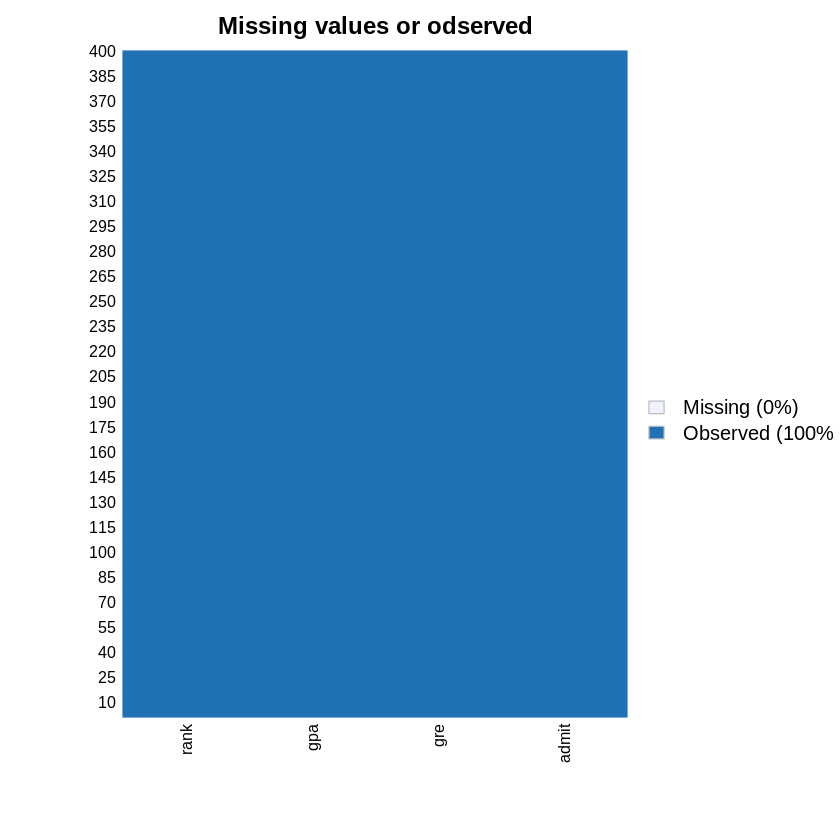

In [ ]:
missmap(mydata, main = "Missing values or odserved")

In [ ]:
table(mydata$admit)


  0   1 
273 127 

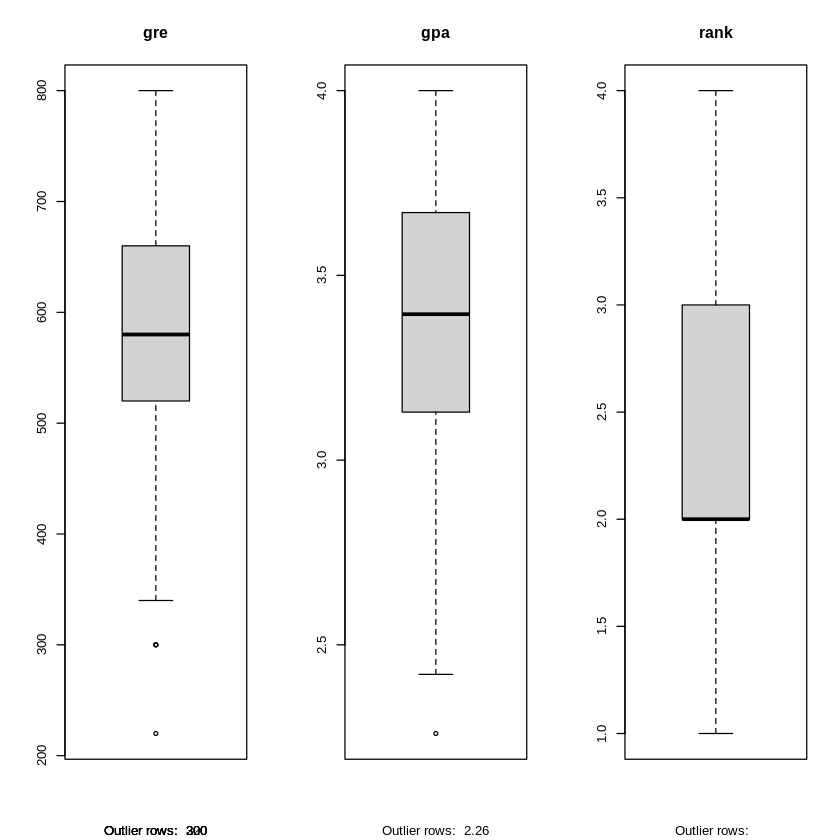

In [ ]:
par(mfcol = c(1, 3))
boxplot(mydata$gre, main = "gre",
        sub = paste("Outlier rows: ", boxplot.stats(mydata$gre)$out))
boxplot(mydata$gpa, main = "gpa",
        sub = paste("Outlier rows: ", boxplot.stats(mydata$gpa)$out))
boxplot(mydata$rank, main = "rank",
        sub = paste("Outlier rows: ", boxplot.stats(mydata$rank)$out))

In [ ]:
gre_outliers = boxplot.stats(mydata$gre)$out
gre_outliers

[1] 300 300 220 300

In [ ]:
mydata[mydata$gre %in% gre_outliers,]

,admit,gre,gpa,rank
,<int>,<int>,<dbl>,<int>
72,0,300,2.92,4
180,0,300,3.01,3
305,0,220,2.83,3
316,1,300,2.84,2


In [ ]:
gpa_outliers = boxplot.stats(mydata$gpa)$out
gpa_outliers

[1] 2.26

In [ ]:
mydata[mydata$gpa %in% gpa_outliers,]

,admit,gre,gpa,rank
,<int>,<int>,<dbl>,<int>
290,0,420,2.26,4


In [ ]:
nrow(mydata)

[1] 400

In [ ]:
mydata <- mydata[!(mydata$gpa %in% gpa_outliers) & !(mydata$gre %in% gre_outliers),]

In [ ]:
nrow(mydata)

[1] 395

In [ ]:
correlations <- cor(mydata[, 1:4])
correlations

,admit,gre,gpa,rank
admit,1.0000000,0.1853550,0.17644592,-0.23623363
gre,0.1853550,1.0000000,0.35937135,-0.10785090
gpa,0.1764459,0.3593714,1.00000000,-0.03994452
rank,-0.2362336,-0.1078509,-0.03994452,1.00000000


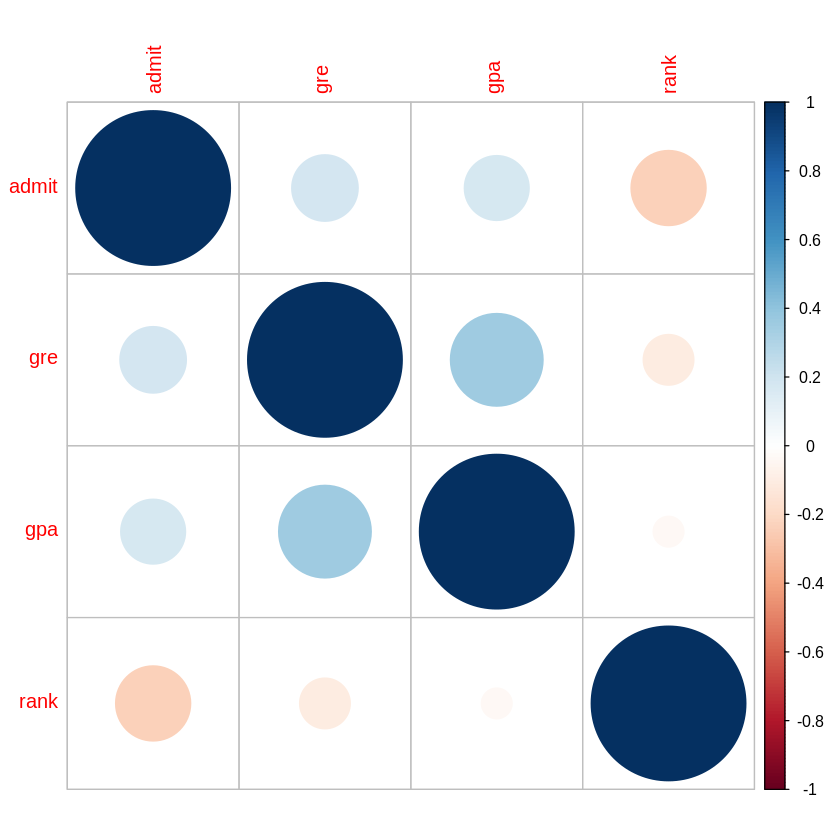

In [ ]:
corrplot(correlations, method = "circle")

In [ ]:
# tao train/test
set.seed(42)
trainingRowIndex <- sample(1:nrow(mydata), 0.7*nrow(mydata), replace = FALSE)
trainingRowIndex

[1]  49 321 153  74 228 146 122 395 128 303  24 327 356  89 165 110  20 370
 [19] 367 297 382 283 109   5 212 348 360 259 314 298 385 158 299 377 136 292
 [37] 324 390 373 378 197   4 226 215 245 114 262 130   3 258 186 138  40 372
 [55]  33 103 391 357 329 157  76 265  35 221  16 220 248 325 118 383  82 380
 [73] 296 149  57 100 366  91 269 181  54 288 208 246  60 285 108 126 112  72
 [91] 310   1 141 206 363  42 300 337 251 336  25 191  32 238  14 111 349 313
[109] 312 242 224 289 214  95   6 252 271  34 188 254 268 387  41 193  66 152
[127]  98 295 107 291 162 124 194 282 293 185 384  37 344 113 241 342 333  78
[145] 266 156 389  97 229 227 182 218 127  31 237  43 180 305  81 187  27  30
[163] 239 320 371  75 209 201 145  62  13 223 308 264  63 388  61 116 304 287
[181] 161  28   2 159 361 243 362 347 225  12 272 364  51 277 284 381  47  56
[199] 144  10 393 247 328 316 374  93 394  84 368 219 102 171 150 154 315  55
[217] 192  58 173 200 240  85 334 195 260 142 330 139 250  18 233  36 148  71
[235] 256 235  94 133  86 163 350 168  38 106 210  90 115 105  11 164  59 352
[253] 234 309 199 167  88 155 135 302 203 196 121 375 346 160  46 286 318  80
[271] 232 120  53 365 172 244

In [ ]:
#train data
trainData <- mydata[trainingRowIndex, ]
nrow(trainData)

[1] 276

In [ ]:
#test
testData <- mydata[-trainingRowIndex, ]
nrow(testData)

[1] 119

## Model

In [ ]:
mylogit <- glm(admit ~ gre + gpa + rank, data = trainData, family = "binomial")
summary(mylogit)


Call:
glm(formula = admit ~ gre + gpa + rank, family = "binomial", 
    data = trainData)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5850  -0.9158  -0.6573   1.1423   2.0949  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.097830   1.354537  -3.025 0.002484 ** 
gre          0.001636   0.001327   1.233 0.217553    
gpa          1.057381   0.391660   2.700 0.006939 ** 
rank        -0.487834   0.147554  -3.306 0.000946 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 352.73  on 275  degrees of freedom
Residual deviance: 326.73  on 272  degrees of freedom
AIC: 334.73

Number of Fisher Scoring iterations: 4


In [ ]:
pred <- predict(mylogit, newdata = testData, type = "response")
pred_value <- ifelse(pred > 0.5, 1, 0)

In [ ]:
result <- data.frame(testAdmit = testData$admit[30:40], pred_value[30:40])
result

,testAdmit,pred_value.30.40.
,<int>,<dbl>
97,0,0
100,0,0
102,0,0
105,1,1
118,0,1
120,0,0
124,0,0
126,0,0
130,0,0


In [ ]:
# solution 1
accuracy <- table(pred_value, testData[,"admit"])
accuracy = sum(diag(accuracy))/ sum(accuracy)
accuracy

[1] 0.6890756

In [ ]:
# sulution 2
misClassificError <- mean(pred_value != testData$admit)
1 - misClassificError

[1] 0.6890756

In [ ]:
install.packages("caret")
library("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: lattice

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


In [ ]:
confusionMatrix(as.factor(pred_value), as.factor(testData$admit))

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 74 25
         1 12  8
                                          
               Accuracy : 0.6891          
                 95% CI : (0.5977, 0.7707)
    No Information Rate : 0.7227          
    P-Value [Acc > NIR] : 0.82224         
                                          
                  Kappa : 0.1171          
                                          
 Mcnemar's Test P-Value : 0.04852         
                                          
            Sensitivity : 0.8605          
            Specificity : 0.2424          
         Pos Pred Value : 0.7475          
         Neg Pred Value : 0.4000          
             Prevalence : 0.7227          
         Detection Rate : 0.6218          
   Detection Prevalence : 0.8319          
      Balanced Accuracy : 0.5514          
                                          
       'Positive' Class : 0               
                                    

In [ ]:
y1 <- predict(mylogit,
              newdata = data.frame(gre = c(580, 800),
                                    gpa = c(3.4, 4),
                                    rank = c(3, 1)),
              type = "response")
y1

1         2 
0.2655516 0.7216627

In [ ]:
y1 <- ifelse(y1 > 0.5, 1, 0)
y1

1 2 
0 1